**Expanding restaurant franchise case study.**

1- Imports:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import warnings
warnings.filterwarnings('ignore')

2- Reading data:

In [2]:
data = np.loadtxt("/kaggle/input/rest-datasets/data1.txt", delimiter=',')
data.shape

(97, 2)

3- Splitting data:

In [3]:
X_train = data[:,0]
y_train = data[:,1]

print ('x_train.shape :', X_train.shape)
print ('y_train.shape : ', y_train.shape)
print ('Training examples:', len(X_train))

x_train.shape : (97,)
y_train.shape :  (97,)
Training examples: 97


4- Visualizing profit and population:

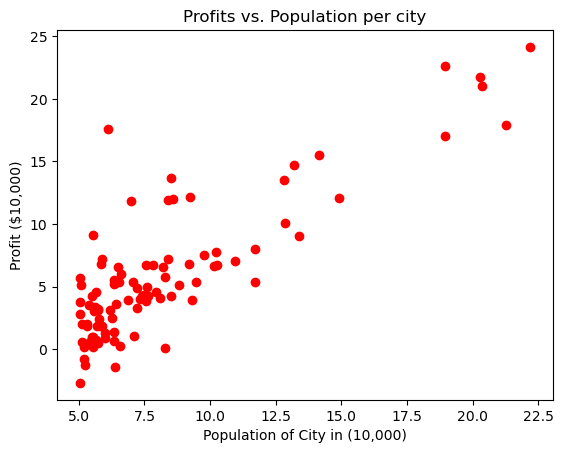

In [4]:
plt.scatter(X_train, y_train,c='r') 
plt.title("Profits vs. Population per city")
plt.xlabel('Population of City in (10,000)')
plt.ylabel('Profit ($10,000)')
plt.show()

5- Computing the cost function:

In [5]:
def getCost(x, y, w, b): 
    len_x = x.shape[0] 
    total_cost = 0
    cost_sum = 0
    for i in range(len_x):
        f = w * x[i] + b 
        cost = (f - y[i]) ** 2
        cost_sum = cost_sum + cost 
    total_cost = (1 / (2 * len_x)) * cost_sum
    return total_cost

6-Gradient descent:

In [6]:
def gradientDescent(x, y, w, b): 
    m = x.shape[0]
    w_gradient = 0
    b_gradient= 0

    for i in range(m):  
        f= w * x[i] + b 
        
        w_gradient_itr= (f- y[i]) * x[i] 
        b_gradient_itr= f - y[i]

        w_gradient += w_gradient_itr
        b_gradient += b_gradient_itr

    w_gradient = w_gradient / m
    b_gradient = b_gradient / m
    return w_gradient, b_gradient

7- Batch gradient descent:

In [18]:
def batchGradientDescent(x, y,meta,gradient_function,cost_function):
    m = len(x)
    w = 0  
    b = 0
    
    for i in range(0,100):
        w_gradient, b_gradient = gradient_function(x, y, w, b )  
        w = w - meta * w_gradient               
        b = b - meta * b_gradient  
        
    cost =  cost_function(x, y, w, b)
    return w, b, cost 

In [19]:
meta=0.01
w,b,cost = batchGradientDescent(X_train,y_train,meta,gradientDescent,getCost)
print("Final weight :",w)
print("Final bias :",b)
print("Cost :",cost)

Final weight : 0.8595815252727688
Final bias : -0.5765562303322347
Cost : 5.479975580535111


In [20]:
m = X_train.shape[0]
X_pred = np.zeros(m)
for i in range(m):
    X_pred[i] = w * X_train[i] + b

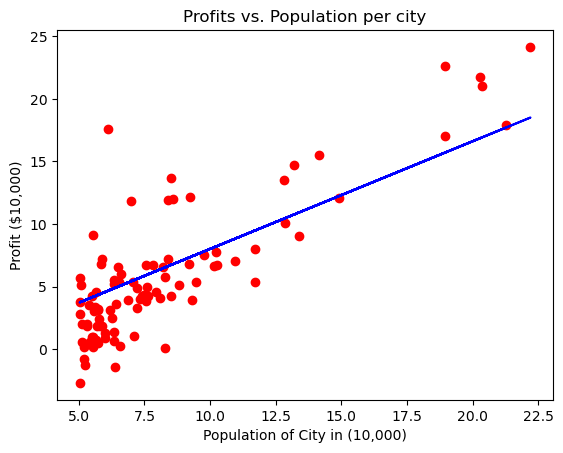

In [21]:
plt.plot(X_train, X_pred, c = "b")
plt.scatter(X_train, y_train, c='r') 
plt.title("Profits vs. Population per city")
plt.xlabel('Population of City in (10,000)')
plt.ylabel('Profit ($10,000)')
plt.show()

In [27]:
for i in range(1000,100000,10000):
    y= i* w + b
    print('For population =',i,', the estimated profit= $',y)

For population = 1000 , the estimated profit= $ 859.0049690424365
For population = 11000 , the estimated profit= $ 9454.820221770125
For population = 21000 , the estimated profit= $ 18050.635474497813
For population = 31000 , the estimated profit= $ 26646.4507272255
For population = 41000 , the estimated profit= $ 35242.26597995318
For population = 51000 , the estimated profit= $ 43838.081232680874
For population = 61000 , the estimated profit= $ 52433.89648540856
For population = 71000 , the estimated profit= $ 61029.71173813625
For population = 81000 , the estimated profit= $ 69625.52699086395
For population = 91000 , the estimated profit= $ 78221.34224359163
